In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [8]:
df = pd.read_csv("archive/CAvideos.csv")
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [10]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [11]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40881.00,40881.00,40881.00,40881.00,40881.00
mean,20.80,1147035.91,39582.69,2009.20,5042.97
std,6.78,3390913.02,132689.53,19008.37,21579.02
min,1.00,733.00,0.00,0.00,0.00
25%,20.00,143902.00,2191.00,99.00,417.00
50%,24.00,371204.00,8780.00,303.00,1301.00
75%,24.00,963302.00,28717.00,950.00,3713.00
max,43.00,137843120.00,5053338.00,1602383.00,1114800.00


In [12]:
df.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
dtype: int64

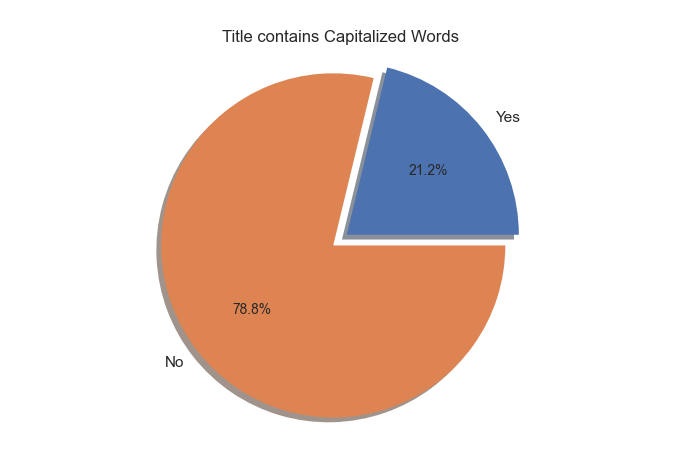

In [25]:
def contains_capitalized_words(title):
    for w in title.split():
        if w.isupper():
            return True
        return False
    
df['contains_capitalized_words'] = df['title'].apply(contains_capitalized_words)
value_counts = df['contains_capitalized_words'].value_counts().to_dict()

fig, ax = plt.subplots()
ax.pie([value_counts[True], value_counts[False]], labels =['Yes', 'No'], autopct='%1.1f%%',shadow=True, startangle=0, explode=(0,0.1))
ax.axis('equal')
ax.set_title('Title contains Capitalized Words')
plt.show()

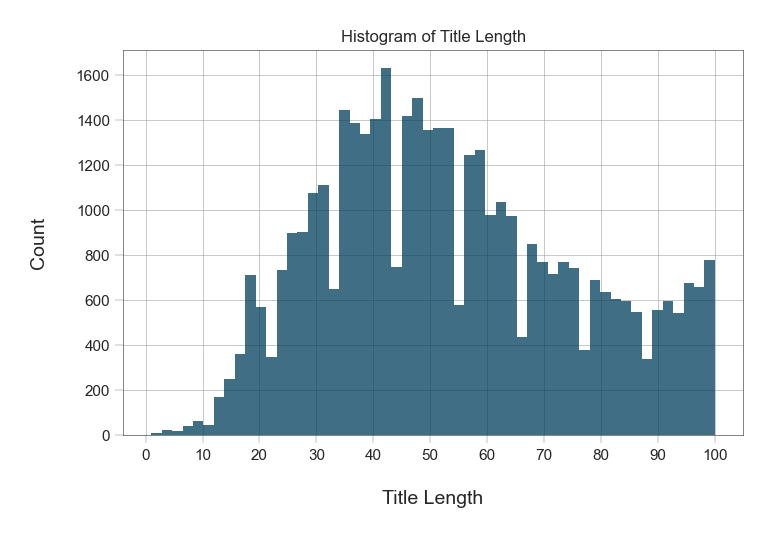

In [49]:
df['title_length'] = df.title.str.len()
fig, ax = plt.subplots()
sns.histplot(df['title_length'], kde = False, color=PLOT_COLORS[4])
ax.set_title('Histogram of Title Length')
ax.set(xlabel='Title Length', ylabel='Count', xticks=range(0,110,10))
plt.show()

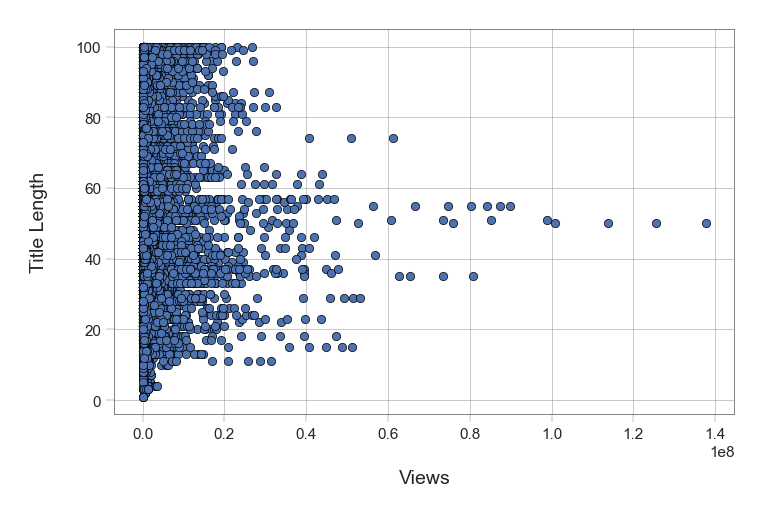

In [53]:
fig, ax = plt.subplots()
ax.scatter(df['views'], df['title_length'] ,edgecolors='black', linewidths=0.5)
ax.set(xlabel='Views', ylabel='Title Length')
plt.show()

<Axes: >

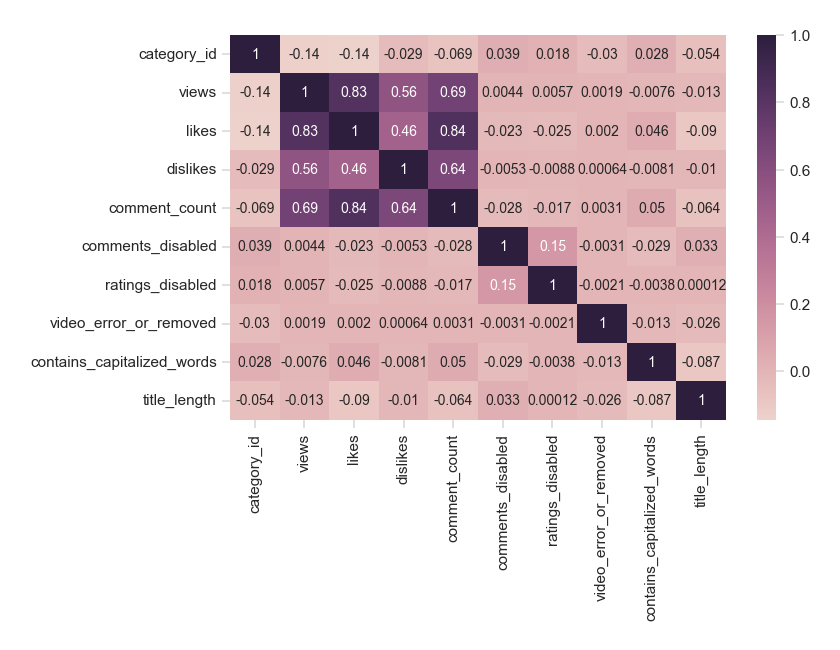

In [59]:
h_labels = df.select_dtypes(include=['number', 'bool']).columns.values
# print(h_labels)
fig, ax = plt.subplots()
sns.heatmap(df[h_labels].corr(), cmap=sns.cubehelix_palette(as_cmap=True), ax=ax, xticklabels=h_labels, yticklabels=h_labels, annot = True)

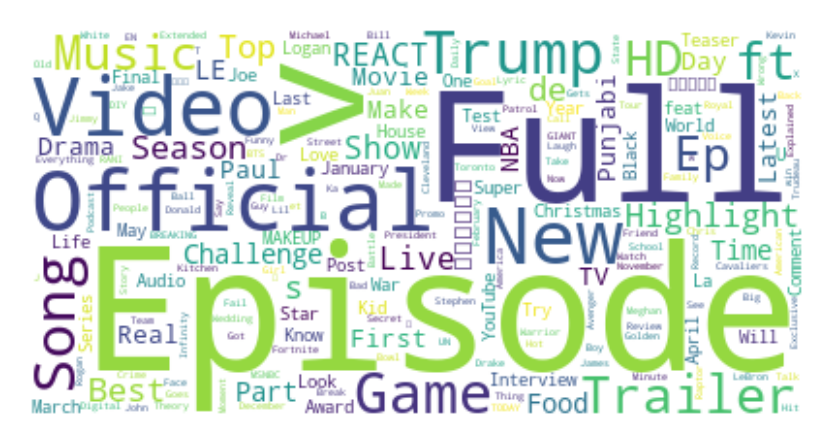

In [63]:
title_words = list(df['title'].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
wc = wordcloud.WordCloud(collocations=False, background_color='White').generate(' '.join(title_words))
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()